In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-true-news-outlets/True.csv/True.csv
/kaggle/input/fake-true-news-outlets/Fake.csv/Fake.csv


In [2]:
df_true=pd.read_csv('/kaggle/input/fake-true-news-outlets/True.csv/True.csv')
df_false=pd.read_csv('/kaggle/input/fake-true-news-outlets/Fake.csv/Fake.csv')
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [8]:
#preprocessing
df_true['Labels']=1
df_false['Labels']=0

df=pd.concat([df_true,df_false], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,title,text,subject,date,Labels
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
...,...,...,...,...,...
44893,Nigeria says U.S. agrees delayed $593 million ...,ABUJA (Reuters) - The United States has formal...,worldnews,"December 27, 2017",1
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1


In [28]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df
#no null values

,title,text,subject,date,Labels
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0
...,...,...,...,...,...
44892,New York protesters camp out at Goldman Sachs ...,NEW YORK (Reuters) - Dozens of protesters gath...,politicsNews,"January 18, 2017",1
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,Middle-east,"June 29, 2016",0
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,Government News,"Feb 27, 2016",0
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,politicsNews,"November 2, 2017",1


In [34]:
#dropping the category and date as i dont need it at the moment
df=df.drop(['subject','date'], axis=1)
df

,title,text,Labels
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,0
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,1
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,0
...,...,...,...
44892,New York protesters camp out at Goldman Sachs ...,NEW YORK (Reuters) - Dozens of protesters gath...,1
44894,Boiler Room #62 – Fatal Illusions,Tune in to the Alternate Current Radio Network...,0
44895,ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...,I m convinced the Freedom From Religion group...,0
44896,Republican tax plan would deal financial hit t...,WASHINGTON (Reuters) - The Republican tax plan...,1


In [36]:
#df.to_csv('fake and true news dataset.csv')

In [38]:
#preparing independent and dependent values
x=df.drop(['Labels'],axis=1)
y=df['Labels']

In [39]:
import tensorflow as tf #for training of deep neural networks
from tensorflow.keras.layers import Embedding #for a real-valued vector representation
from tensorflow.keras.preprocessing.sequence import pad_sequences #to make the input length fixed
from tensorflow.keras.models import Sequential #to create a sequential model
from tensorflow.keras.preprocessing.text import one_hot #to convert sentences into one-hot representations given the vocabulary size
from tensorflow.keras.layers import LSTM #to process the sequences of data
from tensorflow.keras.layers import Dense #receives input from its previous layer

In [42]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
message= x.copy()
message.reset_index(inplace=True)

ps=PorterStemmer()
corpus=[]
for i in range(len(message)):
    review=re.sub('[^a-zA-Z]',' ',message['title'][i])
    review=review.lower().split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

corpus[0:10]

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


['break gop chairman grassley enough demand trump jr testimoni',
 'fail gop candid rememb hilari mock eulog video',
 'mike penc new dc neighbor hilari troll homophob bigot',
 'california ag pledg defend birth control insur coverag',
 'az rancher live us mexico border destroy nanci pelosi claim trump weak want border wall video',
 'privat lawyer trump high court pick friend busi',
 'yemeni salafist imam kill aden sourc',
 'fbi say wit u probe malaysia mdb fear safeti',
 'easi read chart show berni sander social step stone commun',
 'mma fighter jake shield embarrass coward mask violent beat trump support video berkeley watch man get beat mob polic help person jump help']

In [44]:
vocab=5000
onehot_repr=[one_hot(words,vocab) for words in corpus]
onehot_repr[0]

[3444, 2884, 1963, 4387, 4078, 1183, 1529, 2289, 3244]

In [63]:
length = 30 #Setting sentence length
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=length)
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3444,
       2884, 1963, 4387, 4078, 1183, 1529, 2289, 3244], dtype=int32)

In [64]:
del model
import gc
gc.collect() 

506

In [67]:
#creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(input_dim=vocab, output_dim=embedding_vector_features,input_length=length))
model.add(LSTM(100))#100 NEURONS
model.add(Dense(1,activation='sigmoid'))#dense layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
x_final=np.array(embedded_docs)
y_final=np.array(y)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.33, random_state=42)

In [75]:
model.fit(X_train,y_train,validation_data=
(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.8479 - loss: 0.3506 - val_accuracy: 0.9362 - val_loss: 0.1628
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9515 - loss: 0.1265 - val_accuracy: 0.9404 - val_loss: 0.1503
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9620 - loss: 0.1017 - val_accuracy: 0.9446 - val_loss: 0.1465
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9697 - loss: 0.0813 - val_accuracy: 0.9445 - val_loss: 0.1514
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9797 - loss: 0.0603 - val_accuracy: 0.9408 - val_loss: 0.1726
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9837 - loss: 0.0477 - val_accuracy: 0.9397 - val_loss: 0.1893
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9864 - loss: 0.0413 - val_accuracy: 0.9384 - val_loss: 0.2085
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9897 - loss: 0.0306 - 

In [76]:
model.save('my_model.h5')

461/461 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


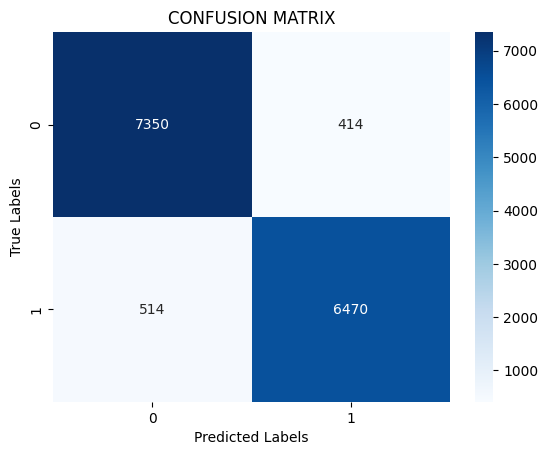

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_prob = model.predict(X_test)
# Convert probabilities to class predictions
y_pred = (y_prob > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title('CONFUSION MATRIX')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9370762137238947

In [85]:
list1=y_test.tolist() #array to list
list2=y_pred.tolist()
d={"Actual values":list1,"Predicted values":list2} #list to dict 
df1=pd.DataFrame(d)
df1

,Actual values,Predicted values
0,1,[1]
1,1,[1]
2,0,[0]
3,0,[0]
4,0,[1]
...,...,...
14743,0,[0]
14744,0,[0]
14745,1,[1]
14746,1,[1]


In [96]:
def predict(string):
    # Convert the string into an integer sequence using one_hot
    ns = one_hot(string, vocab)  # One-hot encoding for the input string
    # Pad the sequence to the desired length
    padded_s = pad_sequences([ns], padding='pre', maxlen=length)  # Wrap `ns` in a list to make it a sequence

    # Predict using the model
    pred = model.predict(padded_s)
    print("News: ", string)
    if pred[0][0]>0.5:
        ver=True
    else:
        ver=False
    print("verdict: ", ver, ", score: ", pred)

c="y"
while "y" in c.lower():
    inp=input("enter the news: ")
    print("Here's the analysis: ")
    predict(inp)
    c=input("wanna continue(y/n):")

enter the news:  modi became the prime minister of india


Here's the analysis: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
News:  modi became the prime minister of india
verdict:  True , score:  [[0.9997721]]


wanna continue(y/n): james gunn directed titanic
